In [ ]:
/content/Project.csv

In [ ]:
#LogisticRegression

<ipython-input-8-120e53f8155c>:10: DtypeWarning: Columns (92) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv('/content/Project.csv')


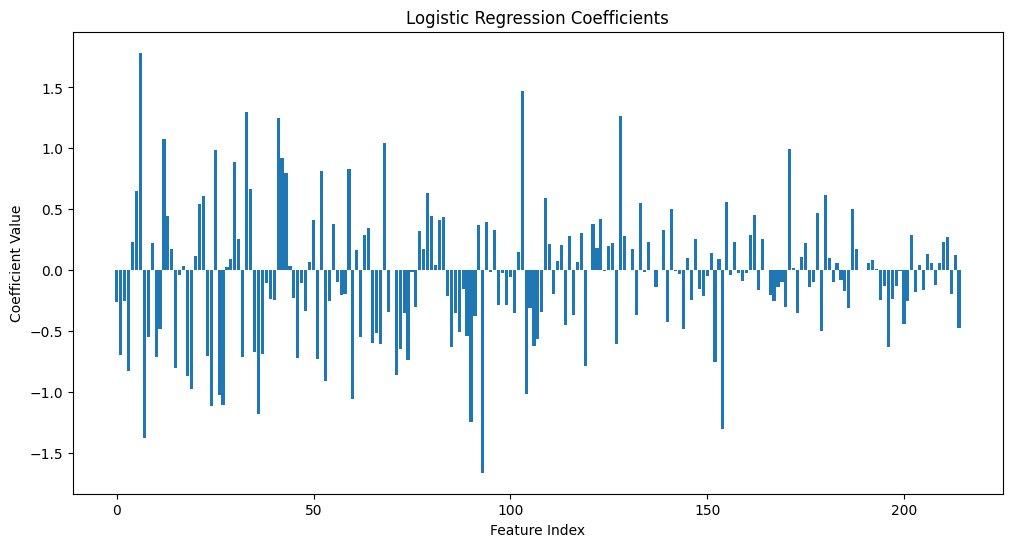

Accuracy: 0.9777260638297872
              precision    recall  f1-score   support

           0       0.98      0.99      0.98      1863
           1       0.98      0.96      0.97      1145

    accuracy                           0.98      3008
   macro avg       0.98      0.98      0.98      3008
weighted avg       0.98      0.98      0.98      3008



In [8]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score
from sklearn.preprocessing import StandardScaler
import numpy as np
import matplotlib.pyplot as plt

# Load the dataset
data = pd.read_csv('/content/Project.csv')

# Convert all feature columns to numeric, replacing non-numeric values with NaN
for col in data.columns:
    if col != 'class':  # Skip the target column
        data[col] = pd.to_numeric(data[col], errors='coerce')

# Handle missing values by filling with the mean of each numeric column
numeric_columns = data.select_dtypes(include=[np.number]).columns
data[numeric_columns] = data[numeric_columns].fillna(data[numeric_columns].mean())

# Separate the dataset into features (X) and the target variable (y)
X = data.drop('class', axis=1)
y = data['class'].astype('category').cat.codes  # Convert categories to numerical codes

# Standardize the features using StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Create a Logistic Regression model
log_reg_model = LogisticRegression(max_iter=1000)

# Train the model with the training data
log_reg_model.fit(X_train, y_train)

# Predict the labels for the test set
y_pred = log_reg_model.predict(X_test)

# Evaluate the model's accuracy
accuracy = accuracy_score(y_test, y_pred)

# Extract the coefficients
coefficients = log_reg_model.coef_.flatten()

# Plot the coefficients
plt.figure(figsize=(12, 6))
plt.bar(np.arange(len(coefficients)), coefficients)
plt.xlabel('Feature Index')
plt.ylabel('Coefficient Value')
plt.title('Logistic Regression Coefficients')
plt.show()

print("Accuracy:", accuracy)
print(classification_report(y_test, y_pred))


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


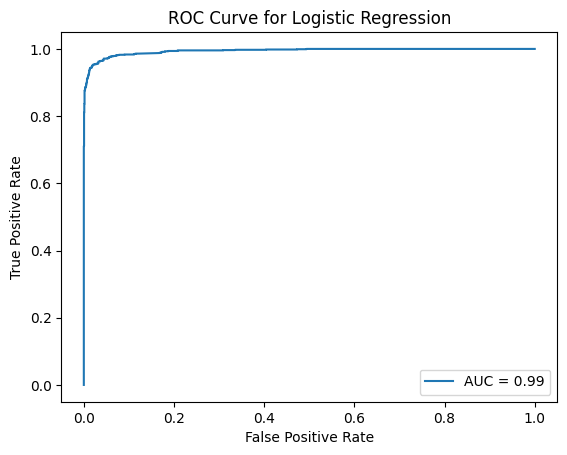

In [16]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve, RocCurveDisplay

# Since we have already trained a Logistic Regression model and have the test set, we can directly calculate the ROC curve

# Predict the probabilities for the test set using the previously trained Logistic Regression model
# Ensure to use the model with the variable name 'log_reg_model' or adjust as needed if the name is different.
y_pred_proba_lr = log_reg_model.predict_proba(X_test)[:, 1]

# Calculate ROC curve
fpr_lr, tpr_lr, thresholds_lr = roc_curve(y_test, y_pred_proba_lr)
roc_auc_lr = roc_auc_score(y_test, y_pred_proba_lr)

# Plot ROC curve
RocCurveDisplay(fpr=fpr_lr, tpr=tpr_lr, roc_auc=roc_auc_lr).plot()
plt.title('ROC Curve for Logistic Regression')
plt.show()



<ipython-input-10-66ac119d1caa>:9: DtypeWarning: Columns (92) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv('/content/Project.csv')


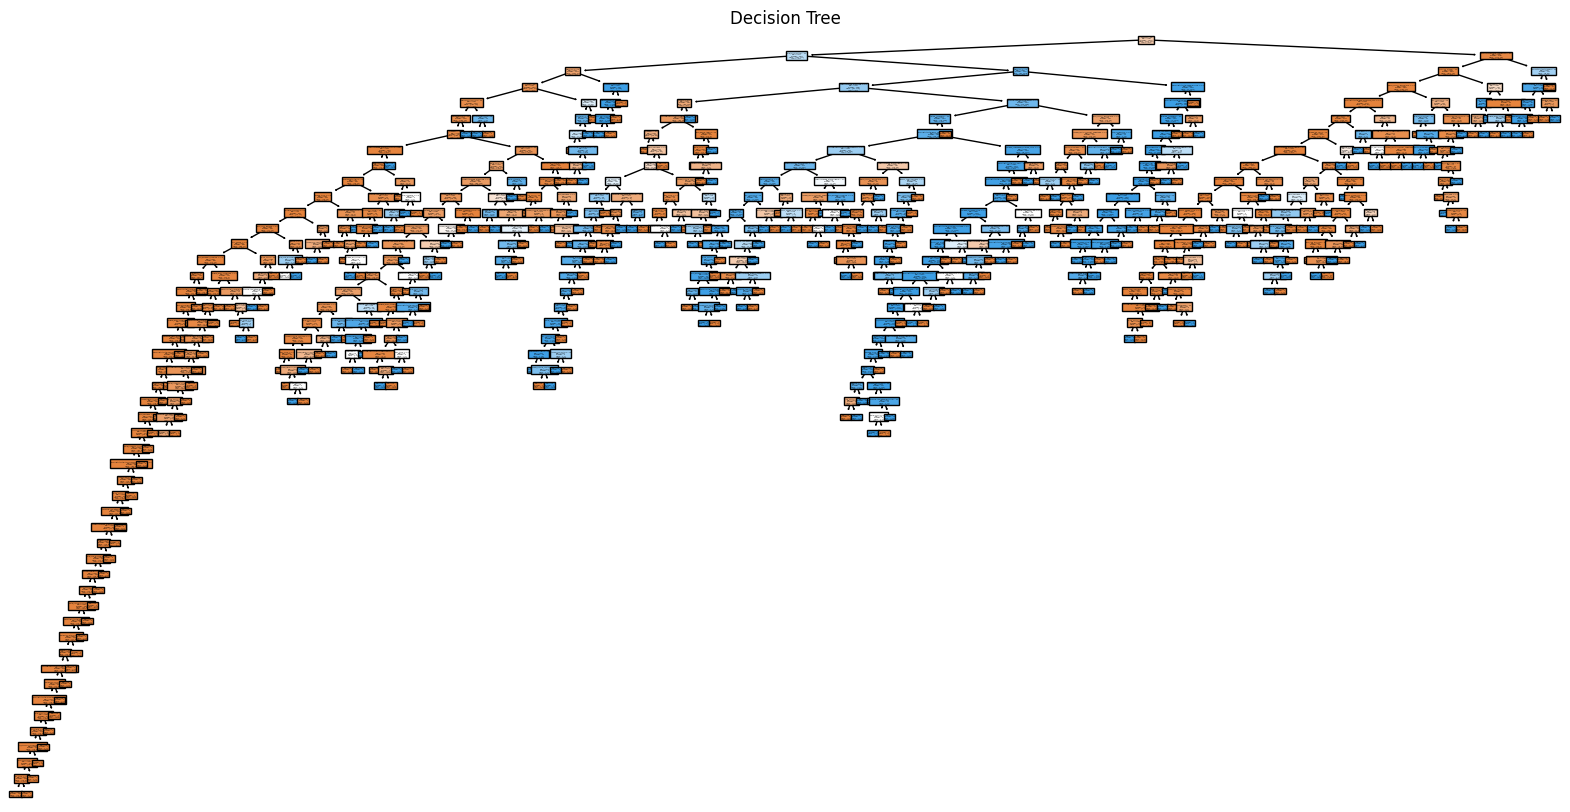

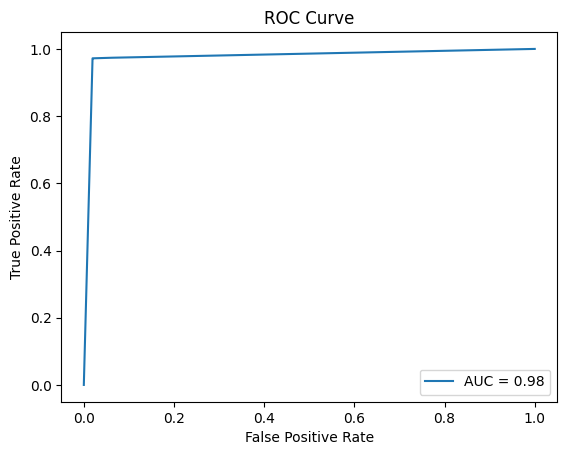

Accuracy: 0.9773936170212766
Recall: 0.9720524017467249
ROC AUC: 0.9766048562327279
              precision    recall  f1-score   support

           0       0.98      0.98      0.98      1863
           1       0.97      0.97      0.97      1145

    accuracy                           0.98      3008
   macro avg       0.98      0.98      0.98      3008
weighted avg       0.98      0.98      0.98      3008



In [10]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score, recall_score, roc_auc_score, RocCurveDisplay
import numpy as np
import matplotlib.pyplot as plt

# Load the dataset (replace with the correct path to your CSV file)
data = pd.read_csv('/content/Project.csv')

# Preprocess the data as before
# Convert all feature columns to numeric, replacing non-numeric values with NaN
for col in data.columns:
    if col != 'class':  # Skip the target column
        data[col] = pd.to_numeric(data[col], errors='coerce')

# Handle missing values by filling with the mean of each numeric column
numeric_columns = data.select_dtypes(include=[np.number]).columns
data[numeric_columns] = data[numeric_columns].fillna(data[numeric_columns].mean())

# Prepare the features (X) and the target variable (y)
X = data.drop('class', axis=1)
y = data['class'].astype('category').cat.codes  # Convert categories to numerical codes

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create the Decision Tree classifier model
decision_tree_model = DecisionTreeClassifier(random_state=42)

# Train the model with the training data
decision_tree_model.fit(X_train, y_train)

# Predict the labels for the test set
y_pred = decision_tree_model.predict(X_test)
y_pred_proba = decision_tree_model.predict_proba(X_test)[:, 1]  # probabilities for ROC

# Performance metrics
accuracy = accuracy_score(y_test, y_pred)
recall = recall_score(y_test, y_pred, pos_label=1)  # Assuming '1' is the positive class
roc_auc = roc_auc_score(y_test, y_pred_proba)

# Plot the tree
plt.figure(figsize=(20, 10))
plot_tree(decision_tree_model, filled=True, feature_names=X.columns, class_names=['Class0', 'Class1'])
plt.title('Decision Tree')
plt.show()

# Plot ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
roc_display = RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc).plot()
plt.title('ROC Curve')
plt.show()

print("Accuracy:", accuracy)
print("Recall:", recall)
print("ROC AUC:", roc_auc)
print(classification_report(y_test, y_pred))


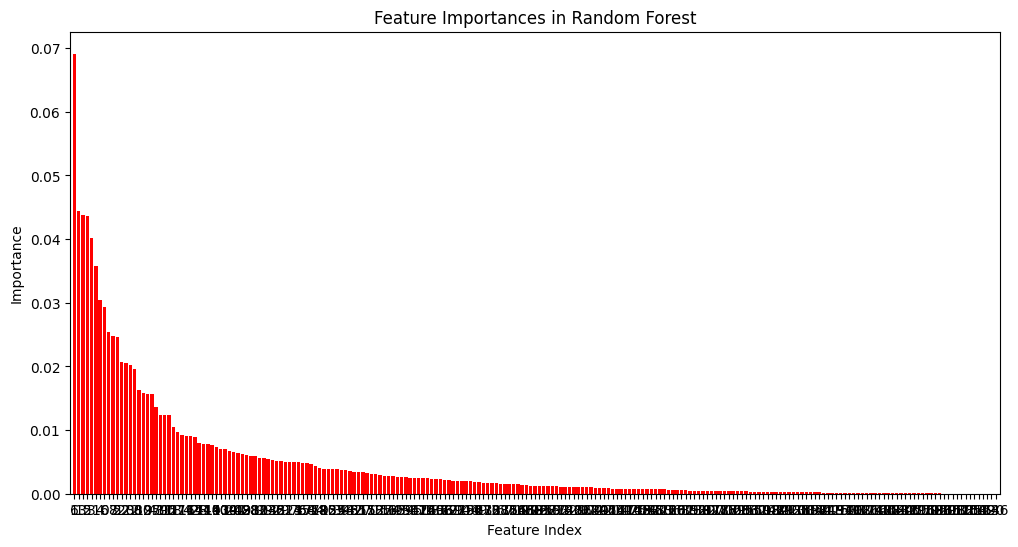

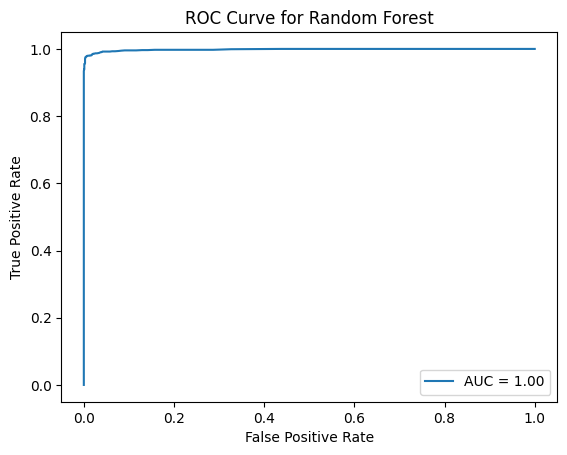

(0.9883643617021277,
 0.9755458515283842,
 0.9982063957508549,
 '              precision    recall  f1-score   support\n\n           0       0.99      1.00      0.99      1863\n           1       0.99      0.98      0.98      1145\n\n    accuracy                           0.99      3008\n   macro avg       0.99      0.99      0.99      3008\nweighted avg       0.99      0.99      0.99      3008\n')

In [11]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score, recall_score, roc_auc_score, RocCurveDisplay
import matplotlib.pyplot as plt

# Assuming 'X_train', 'X_test', 'y_train', 'y_test' are already defined from the previous code blocks

# Create the Random Forest classifier model
random_forest_model = RandomForestClassifier(random_state=42)

# Train the model with the training data
random_forest_model.fit(X_train, y_train)

# Predict the labels for the test set
y_pred = random_forest_model.predict(X_test)
y_pred_proba = random_forest_model.predict_proba(X_test)[:, 1]  # probabilities for ROC

# Performance metrics
accuracy_rf = accuracy_score(y_test, y_pred)
recall_rf = recall_score(y_test, y_pred, pos_label=1)  # Assuming '1' is the positive class
roc_auc_rf = roc_auc_score(y_test, y_pred_proba)

# Plot feature importances
importances = random_forest_model.feature_importances_
indices = np.argsort(importances)[::-1]

plt.figure(figsize=(12, 6))
plt.title('Feature Importances in Random Forest')
plt.bar(range(X_train.shape[1]), importances[indices], color="r", align="center")
plt.xticks(range(X_train.shape[1]), indices)
plt.xlim([-1, X_train.shape[1]])
plt.xlabel('Feature Index')
plt.ylabel('Importance')
plt.show()

# Plot ROC Curve
fpr_rf, tpr_rf, _ = roc_curve(y_test, y_pred_proba)
RocCurveDisplay(fpr=fpr_rf, tpr=tpr_rf, roc_auc=roc_auc_rf).plot()
plt.title('ROC Curve for Random Forest')
plt.show()

# Output the performance metrics
accuracy_rf, recall_rf, roc_auc_rf, classification_report(y_test, y_pred)


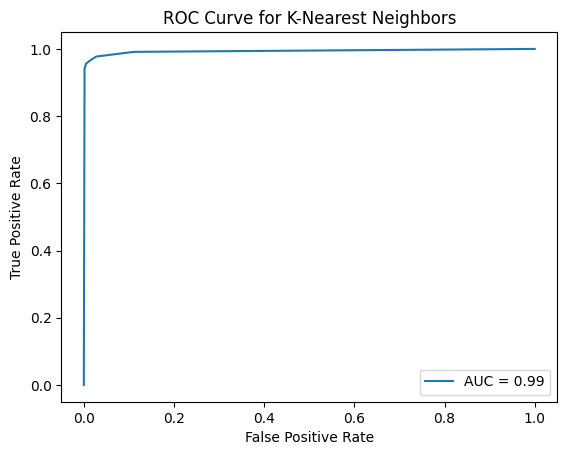

Accuracy: 0.9773936170212766
Recall: 0.9685589519650655
ROC AUC: 0.9930433376227945
              precision    recall  f1-score   support

           0       0.98      0.98      0.98      1863
           1       0.97      0.97      0.97      1145

    accuracy                           0.98      3008
   macro avg       0.98      0.98      0.98      3008
weighted avg       0.98      0.98      0.98      3008



In [12]:
from sklearn.neighbors import KNeighborsClassifier

# We will use the same train-test split as before: 'X_train', 'X_test', 'y_train', 'y_test'

# Create a K-Nearest Neighbors classifier model. We'll start with k=5.
knn_model = KNeighborsClassifier(n_neighbors=5)

# Train the model with the training data
knn_model.fit(X_train, y_train)

# Predict the labels for the test set
y_pred = knn_model.predict(X_test)
y_pred_proba = knn_model.predict_proba(X_test)[:, 1]  # probabilities for ROC

# Performance metrics
accuracy_knn = accuracy_score(y_test, y_pred)
recall_knn = recall_score(y_test, y_pred, pos_label=1)  # Assuming '1' is the positive class
roc_auc_knn = roc_auc_score(y_test, y_pred_proba)

# Plot ROC Curve
fpr_knn, tpr_knn, _ = roc_curve(y_test, y_pred_proba)
RocCurveDisplay(fpr=fpr_knn, tpr=tpr_knn, roc_auc=roc_auc_knn).plot()
plt.title('ROC Curve for K-Nearest Neighbors')
plt.show()

# Output the performance metrics
print("Accuracy:", accuracy_knn)
print("Recall:", recall_knn)
print("ROC AUC:", roc_auc_knn)
print(classification_report(y_test, y_pred))



In [14]:
from sklearn.svm import LinearSVC

# Create a LinearSVC classifier model
linear_svc_model = LinearSVC(random_state=42, max_iter=10000)

# Train the model with the training data
linear_svc_model.fit(X_train, y_train)

# Predict the labels for the test set
y_pred = linear_svc_model.predict(X_test)

# Since LinearSVC does not provide probabilities by default, we'll skip ROC AUC
# But we can still compute accuracy and recall
accuracy_linear_svc = accuracy_score(y_test, y_pred)
recall_linear_svc = recall_score(y_test, y_pred, pos_label=1)

# Output the performance metrics
print("Accuracy:", accuracy_linear_svc)
print("Recall:", recall_linear_svc)
print(classification_report(y_test, y_pred))



Accuracy: 0.9773936170212766
Recall: 0.9615720524017467
              precision    recall  f1-score   support

           0       0.98      0.99      0.98      1863
           1       0.98      0.96      0.97      1145

    accuracy                           0.98      3008
   macro avg       0.98      0.97      0.98      3008
weighted avg       0.98      0.98      0.98      3008



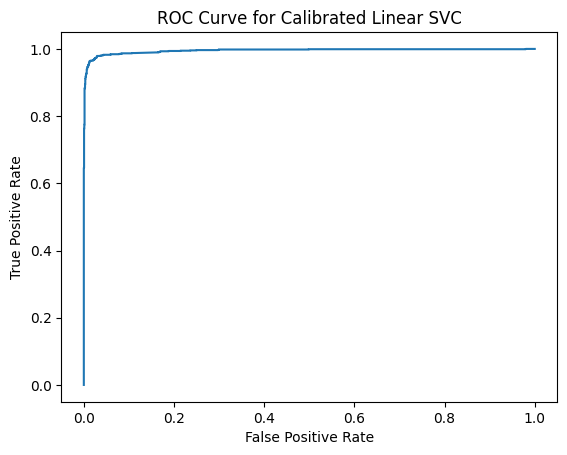

In [15]:
from sklearn.calibration import CalibratedClassifierCV
from sklearn.metrics import roc_curve, RocCurveDisplay

# Wrap LinearSVC with CalibratedClassifierCV to get probability estimates
calibrated_svc = CalibratedClassifierCV(LinearSVC(random_state=42, max_iter=10000))
calibrated_svc.fit(X_train, y_train)

# Predict the probabilities for the test set
y_proba = calibrated_svc.predict_proba(X_test)[:, 1]

# Calculate ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_proba)

# Plot ROC curve
RocCurveDisplay(fpr=fpr, tpr=tpr).plot()
plt.title('ROC Curve for Calibrated Linear SVC')
plt.show()
